In [31]:
import torch
import utils
import matplotlib.pyplot as plt
from lucent.optvis import render
from lucent.modelzoo.util import get_model_layers
from pedestrian_dataset import PennFudanDataset, get_transform
from classifier import Classifier, draw_bounding_boxes, show

import numpy as np
import captum
import torch
from torch import Tensor
from captum.attr import IntegratedGradients
from captum.attr import GradientShap
from captum.attr import Occlusion
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz
from matplotlib.colors import LinearSegmentedColormap

from classifier import Classifier
from pedestrian_dataset import PennFudanDataset, get_transform

In [21]:
data_dir = '../PennFudanPed'
dataset= PennFudanDataset(data_dir, get_transform(train=False), get_original_image=True)

In [22]:
data_loader = torch.utils.data.DataLoader(
            dataset, batch_size=1, shuffle=False, num_workers=4,
            collate_fn=utils.collate_fn)

In [23]:
element = dataset[-1]

<Figure size 1440x4320 with 0 Axes>

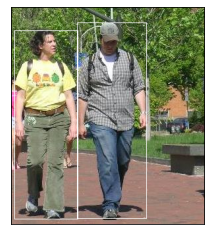

In [24]:
boxed_image = draw_bounding_boxes(element[1]['original'], element[1]['boxes'])
show(boxed_image)

In [25]:
classifier = Classifier.load('../pedestrian_trained_models/4/epoch0')

In [26]:
prediction = classifier.predict(element[0])

In [27]:
prediction

[{'boxes': tensor([[  4.9188,  54.2384, 101.7706, 327.4624],
          [ 93.6493,  36.0883, 210.7045, 320.9520],
          [  1.0308, 116.7579,  14.7770, 243.8338],
          [  7.8108, 128.1068, 102.1664, 225.6588],
          [ 19.8018, 137.7816,  83.7694, 321.0729],
          [102.5207,  61.6229, 206.0043, 196.9612],
          [ 77.1664,  67.7244, 111.7685, 242.3322]], grad_fn=<StackBackward0>),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1]),
  'scores': tensor([0.9955, 0.9942, 0.1374, 0.1109, 0.1102, 0.0785, 0.0507],
         grad_fn=<IndexBackward0>)}]

<Figure size 1440x4320 with 0 Axes>

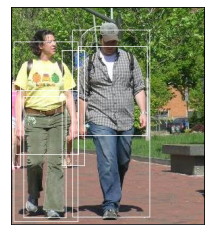

In [8]:
boxed_image = draw_bounding_boxes(element[1]['original'], prediction[0]['boxes'])
show(boxed_image)


In [9]:
classifier = Classifier.load('../pedestrian_trained_models/4/epoch10')

In [10]:
prediction = classifier.predict(element[0])


<Figure size 1440x4320 with 0 Axes>

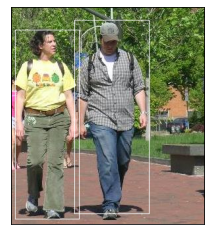

In [11]:
boxed_image = draw_bounding_boxes(element[1]['original'], prediction[0]['boxes'])
show(boxed_image)


In [12]:
classifier.model


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [14]:
get_model_layers(classifier.model)

['transform',
 'backbone',
 'backbone_body',
 'backbone_body_conv1',
 'backbone_body_bn1',
 'backbone_body_relu',
 'backbone_body_maxpool',
 'backbone_body_layer1',
 'backbone_body_layer1_0',
 'backbone_body_layer1_0_conv1',
 'backbone_body_layer1_0_bn1',
 'backbone_body_layer1_0_conv2',
 'backbone_body_layer1_0_bn2',
 'backbone_body_layer1_0_conv3',
 'backbone_body_layer1_0_bn3',
 'backbone_body_layer1_0_relu',
 'backbone_body_layer1_0_downsample',
 'backbone_body_layer1_0_downsample_0',
 'backbone_body_layer1_0_downsample_1',
 'backbone_body_layer1_1',
 'backbone_body_layer1_1_conv1',
 'backbone_body_layer1_1_bn1',
 'backbone_body_layer1_1_conv2',
 'backbone_body_layer1_1_bn2',
 'backbone_body_layer1_1_conv3',
 'backbone_body_layer1_1_bn3',
 'backbone_body_layer1_1_relu',
 'backbone_body_layer1_2',
 'backbone_body_layer1_2_conv1',
 'backbone_body_layer1_2_bn1',
 'backbone_body_layer1_2_conv2',
 'backbone_body_layer1_2_bn2',
 'backbone_body_layer1_2_conv3',
 'backbone_body_layer1_2_bn

  0%|          | 1/512 [00:16<2:24:25, 16.96s/it]

Interrupted optimization at step 2.



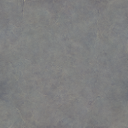

In [19]:
_ = render.render_vis(classifier.model, "backbone_body_layer4_2_conv3:1000", show_inline=True)

In [ ]:
sum(p.numel() for p in classifier.model.parameters())

In [42]:
classifier = Classifier.load('../pedestrian_trained_models/1/epoch9')
sum(p.numel() for p in classifier.model.parameters())

82352981

In [49]:
## Attributes

classifier = Classifier.load('trained_models/epoch10')
classifier.model.eval()
dataset_test = PennFudanDataset(data_dir, get_transform(train=False), get_original_image=True)
indices = torch.randperm(len(dataset_test)).tolist()
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])
input_ = dataset_test[0]
normalized_input = input_[0].unsqueeze(0)
normalized_input.requires_grad = True

def wrapper(inp):
    # print(classifier.model(inp))
    res =  torch.stack([torch.sum(el['scores']) for el in classifier.model(inp)])
    # print(res)
    return res

In [50]:
integrated_gradients = IntegratedGradients(wrapper)
attributions_ig = integrated_gradients.attribute(normalized_input, n_steps=2)

[{'boxes': tensor([[138.1965, 103.1501, 239.4998, 387.3208],
        [314.4816, 102.0343, 397.6432, 397.0526],
        [401.7441, 103.4282, 514.2648, 400.9648]], grad_fn=<StackBackward0>), 'labels': tensor([1, 1, 1]), 'scores': tensor([0.9974, 0.9965, 0.9964], grad_fn=<IndexBackward0>)}, {'boxes': tensor([[139.3643, 101.8739, 240.1192, 387.2547],
        [400.4602, 102.5460, 515.6854, 400.4107],
        [314.2015, 100.4499, 398.2276, 398.7137]], grad_fn=<StackBackward0>), 'labels': tensor([1, 1, 1]), 'scores': tensor([0.9975, 0.9968, 0.9966], grad_fn=<IndexBackward0>)}]
tensor([2.9903, 2.9909], grad_fn=<StackBackward0>)


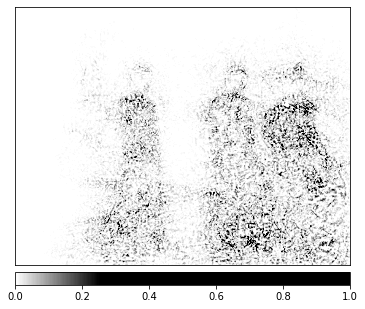

In [51]:
default_cmap = LinearSegmentedColormap.from_list('custom blue',
                                                 [(0, '#ffffff'),
                                                  (0.25, '#000000'),
                                                  (1, '#000000')], N=256)

_ = viz.visualize_image_attr(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1, 2, 0)),
                             np.transpose(input_[1]['original'].squeeze().cpu().detach().numpy(), (1, 2, 0)),
                             method='heat_map',
                             cmap=default_cmap,
                             show_colorbar=True,
                             sign='positive',
                             outlier_perc=1)